In [1]:
library(ggplot2)

In [2]:
dates = as.Date(c(
    "2014-07-24", # https://datacarpentry.github.io/2014-07-24-beacon/
    "2014-09-29", # https://datacarpentry.github.io/2014-09-29-iDigBio/
    "2015-04-02", # https://xuf12.github.io/2015-04-02-umiami/
    "2015-05-04", # https://mckays630.github.io/2015-05-04-usfcms/
    "2015-09-23", # http://www.datacarpentry.org/2015-09-23-TDWG/
    "2016-01-21", # https://swcarpentry.github.io/training-florida-2016-01-21/
    "2016-05-23", # https://weecology.github.io/2016-03-24-UFII-SWC/
    "2016-08-17", # https://acislab.github.io/2016-08-17-UF-Informatics-Institute/
    "2016-10-17", # https://weecology.github.io/2016-10-17-uf/
    "2016-12-03", # https://idigbio.github.io/2016-12-03-tdwg-costa-rica/
    "2017-02-26", # https://acislab.github.io/2017-02-06-UF-Informatics-Institute/
    "2017-05-22", # https://fmichonneau.github.io/2017-05-22-ttt-UFII/
    "2017-05-25", # https://weecology.github.io/2017-05-25-UF/
    "2017-06-29", # https://fsulib.github.io/2017-06-29-fsu/
    "2017-08-14", # https://uf-carpentry.github.io/2017-08-14-UFII-SwC/
    "2017-08-15", # https://uf-carpentry.github.io/2017-08-14-UFII-DC/
    "2017-09-30", # https://idigbio.github.io/2017-09-30-TDWG-Ottawa/
    "2017-10-30" # https://idigbio.github.io/2017-10-30-iDigBio-Summit-UFII/
))
types = c(
    "d",
    "d",
    "s",
    "s",
    "d",
    "i",
    "s",
    "s",
    "d",
    "s",
    "s",
    "i",
    "s",
    "d",
    "s",
    "d",
    "d",
    "d" 
)
roles = c(
    "h",
    "i",
    "i",
    "i",
    "i",
    "h",
    "oi",
    "oi",
    "o",
    "i",
    "oi",
    "h",
    "o",
    "i",
    "oi",
    "o",
    "oi",
    "oi" 
)
num = c(
    1,
    1,
    2,
    3,
    4,
    2,
    1,
    2,
    1,
    5,
    3,
    3,
    2,
    6,
    4,
    3,
    5,
    6
)

df <- data.frame(date=dates, type=types, role=roles, num=num)

In [3]:
df

date,type,role,num
2014-07-24,d,h,1
2014-09-29,d,i,1
2015-04-02,s,i,2
2015-05-04,s,i,3
2015-09-23,d,i,4
2016-01-21,i,h,2
2016-05-23,s,oi,1
2016-08-17,s,oi,2
2016-10-17,d,o,1
2016-12-03,s,i,5


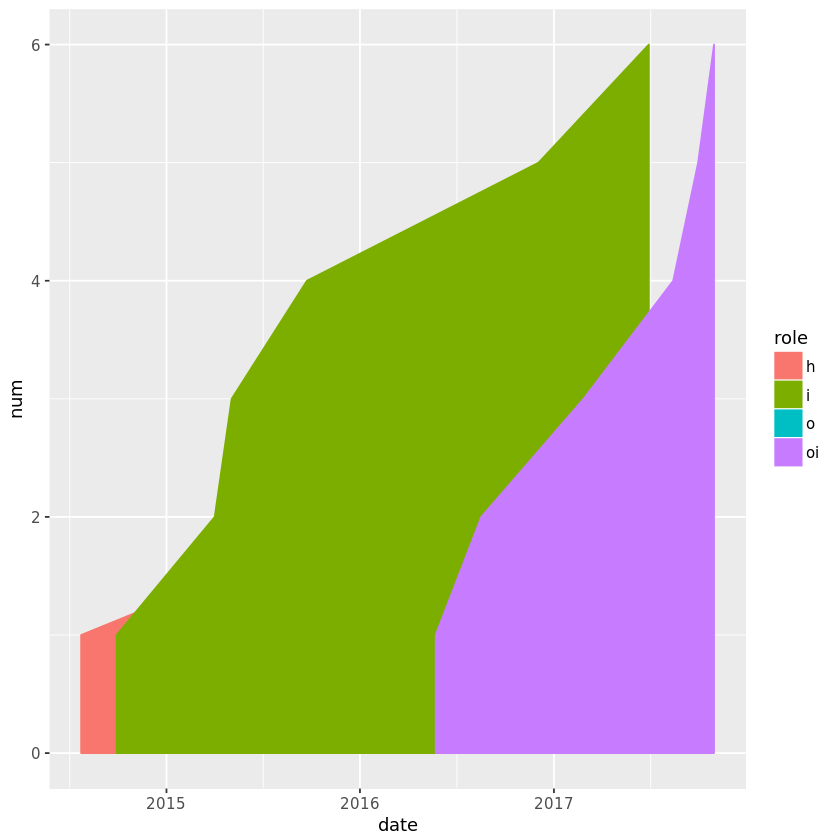

In [4]:
ggplot(df, aes(x = date, y = num)) + geom_area(aes(colour=role, fill=role))
# , fill = role
#+ geom_area(position = 'stack')

In [5]:
activity = read.csv("~/carp_activity.csv", header=TRUE, stringsAsFactors=FALSE)
head(activity, 3)

date,type,helper,instructor,org_inst,organizer
2014-07-24,d,1,0,0,0
2014-09-29,d,0,1,0,0
2015-04-02,s,0,1,0,0


In [6]:
library(tidyr)

In [7]:
#activity$helper_cs = cumsum(activity$helper)
#activity$instructor_cs = cumsum(activity$instructor)
#activity$org_inst_cs = cumsum(activity$org_inst)
#activity$organizer_cs = cumsum(activity$organizer)

In [8]:
cumulative_activity = data.frame(date=as.Date(activity$date), 
                                type=activity$type, 
                                helper=cumsum(activity$helper),
                                instructor=cumsum(activity$instructor),
                                org_inst=cumsum(activity$org_inst),
                                organizer=cumsum(activity$organizer)
                                )
head(cumulative_activity, 2)

date,type,helper,instructor,org_inst,organizer
2014-07-24,d,1,0,0,0
2014-09-29,d,1,1,0,0


In [9]:
activity_long = gather(cumulative_activity, role, total, helper:organizer)
head(activity_long, 25)

date,type,role,total
2014-07-24,d,helper,1
2014-09-29,d,helper,1
2015-04-02,s,helper,1
2015-05-04,s,helper,1
2015-09-23,d,helper,1
2016-01-21,i,helper,2
2016-05-23,s,helper,2
2016-08-17,s,helper,2
2016-10-17,d,helper,2
2016-12-03,s,helper,2


In [10]:
str(cumulative_activity)

'data.frame':	18 obs. of  6 variables:
 $ date      : Date, format: "2014-07-24" "2014-09-29" ...
 $ type      : Factor w/ 3 levels "d","i","s": 1 1 3 3 1 2 3 3 1 3 ...
 $ helper    : int  1 1 1 1 1 2 2 2 2 2 ...
 $ instructor: int  0 1 2 3 4 4 4 4 4 5 ...
 $ org_inst  : int  0 0 0 0 0 0 1 2 2 2 ...
 $ organizer : int  0 0 0 0 0 0 0 0 1 1 ...


In [11]:
str(activity_long)

'data.frame':	72 obs. of  4 variables:
 $ date : Date, format: "2014-07-24" "2014-09-29" ...
 $ type : Factor w/ 3 levels "d","i","s": 1 1 3 3 1 2 3 3 1 3 ...
 $ role : chr  "helper" "helper" "helper" "helper" ...
 $ total: int  1 1 1 1 1 2 2 2 2 2 ...


In [16]:
activity_long$role <- factor(activity_long$role, levels=c("organizer", "org_inst", "instructor", "helper"))

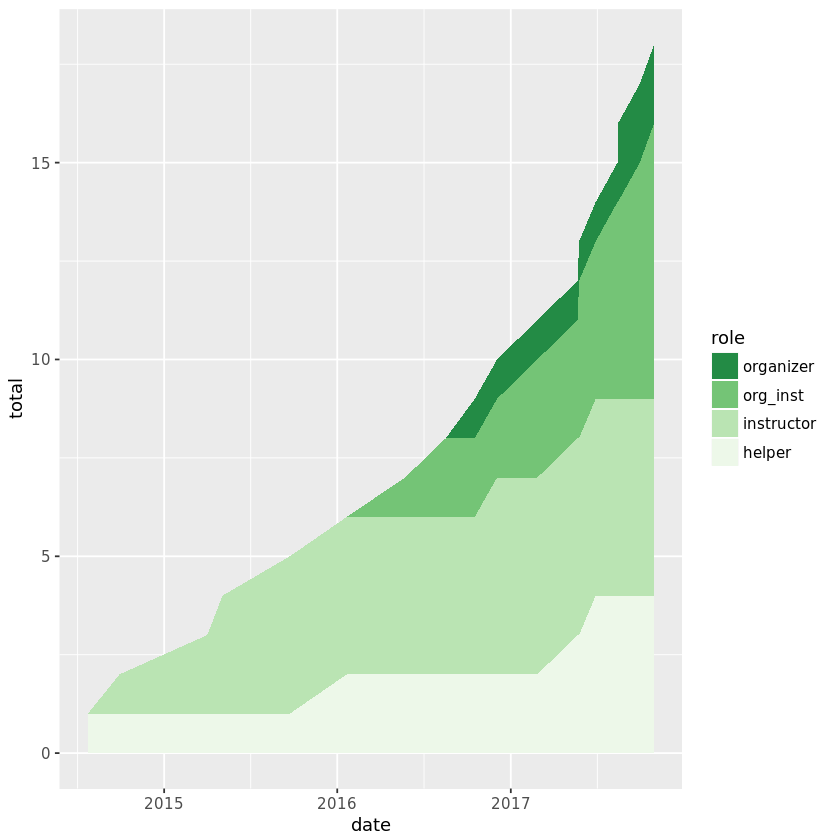

In [18]:
p <- ggplot(activity_long[order(activity_long$role),], aes(x = date, y = total, fill=role)) + 
  geom_area() +
  scale_fill_brewer(palette="Greens", direction=-1)
print(p)